In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pickle

In [8]:
import vdetect
from vdetect import define_loops_custom_3 as define_loops_func

In [5]:
test_images = [mpimg.imread(f) for f in glob('test_images/*.jpg')]

In [12]:
TIMESTAMP = '2018-04-15_113152'
clf_selected = ['random_forest_default', 'decision_tree_bigger_split']

classifiers_file = 'serialize/{0}/classifiers.p'.format(TIMESTAMP)
scaler_file = 'serialize/{0}/scaler.p'.format(TIMESTAMP)
hp_file = 'serialize/{0}/hyper.json'.format(TIMESTAMP)

hyperparams = vdetect.load_json(hp_file)
scaler = vdetect.load_pickle(scaler_file)
classifiers = vdetect.load_pickle(classifiers_file)

selected_classifiers = vdetect.select_classifiers(classifiers, clf_selected)

extract = vdetect.create_feature_extractor(scaler, hyperparams)

loops = define_loops_func()

In [13]:
heatmaps = []
for im in test_images:
    
    heatmap = vdetect.sliding_window(im, loops, extract, selected_classifiers)
    heatmaps.append(heatmap)    

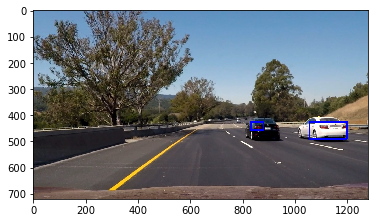

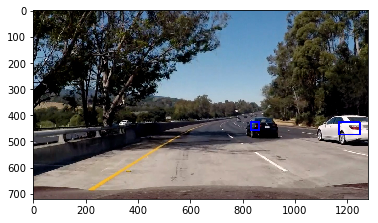

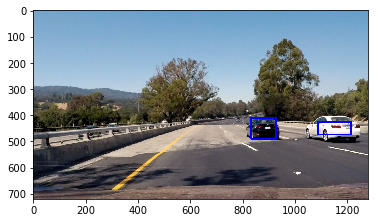

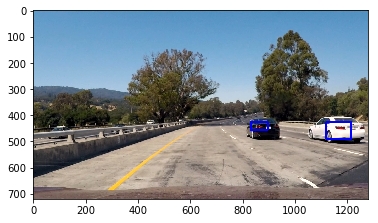

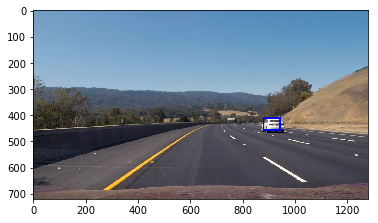

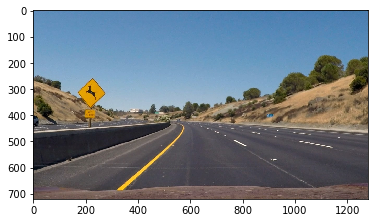

In [17]:
for im, heatmap in zip(test_images, heatmaps):

    bboxes = vdetect.segment_vehicles(heatmap, threshold_ratio=0.7)
    
    plt.figure()
    if bboxes is not None:
        plt.imshow(vdetect.draw_boxes(im, bboxes))
    else:
        plt.imshow(im)
    